In [1]:

import numpy as np
import h5py
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#IMPORT ALL PRE BUILD FUNCTION 
from func import *
from momentum import *
from RMSprop import *
from adam import *
from matplotlib import pyplot as plt

In [2]:
hf1 = h5py.File('/pythonfile/popular_optimizer/train_datasets.h5','r')  #READ THE DATASETS
X_train = hf1.get('X_train')     #GET THE X TRAINING DATASETS
Y_train = hf1.get('Y_train')
#flatten the array and normalize 
X_train = np.reshape(X_train,(X_train.shape[0],-1))  #FLATTEN   (209, 64 *64 * 3)
X_train = preprocessing.normalize(X_train)           #NORMALIZING THE DATASETS

Y_train = np.reshape(Y_train,(Y_train.shape[0],1))                # MAKING SURE IT IS IN CORRECT SHAPE

print("Shape of X_train {}  and  Y_train {}".format(X_train.shape,Y_train.shape))

Shape of X_train (259, 12288)  and  Y_train (259, 1)


In [3]:
def model(X,Y,learning_rate,num_iter,hidden_size,keep_prob,optimizer):
    L = len(hidden_size)
    params = initilization(X.shape[1], hidden_size)
    costs = []
    itr  = []

    if optimizer == 'Momentum':
        v = initilization_moment(params)

    elif optimizer == 'Rmsprop':
        s = initilization_RMS(params)

    elif optimizer == 'adam' :
        v,s = initilization_Adam(params)

    for i in range(1,num_iter):
        MiniBatches = RandomMiniBatches(X, Y, 32)   # GET RAMDOMLY MINIBATCHES
        p , q = MiniBatches[2]
        for MiniBatch in MiniBatches:               #LOOP FOR MINIBATCHES

            (MiniBatch_X, MiniBatch_Y) = MiniBatch

            cache, A = model_forward(MiniBatch_X, params, L,keep_prob)     #FORWARD PROPOGATIONS
            cost = cost_f(A, MiniBatch_Y)                                  #COST FUNCTION
            grad = backward(MiniBatch_X, MiniBatch_Y, params, cache, L,keep_prob) #BACKWARD PROPAGATION 

            if optimizer == 'Momentum':
                params = update_params_with_momentum(params, grad, v, beta=0.9,learning_rate=learning_rate)

            elif optimizer == 'Rmsprop':
               params = update_params_with_RMS(params, grad, s, beta=0.9,learning_rate=learning_rate)

            elif optimizer == 'Adam' :
                params = update_params_with_Adam(params, grad,v, s, beta1=0.9,beta2=0.999,  learning_rate=learning_rate,t=i)                                         #UPDATE PARAMETERS
            elif optimizer == "minibatch":
                params = update_params(params, grad,learning_rate=learning_rate) 

           
        
        if i%25 == 0:
            costs.append(cost)
            itr.append(i)
            if i % 200 == 0 :
                print('cost of iteration______{}______{}'.format(i,cost))
    return params,costs,itr

In [4]:
params, cost_sgd,itr = model(X_train, Y_train, learning_rate = 0.0001,
               num_iter=2000, hidden_size=[50, 1],keep_prob=1,optimizer='minibatch')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______200______0.6364615981070825
cost of iteration______400______0.6539404258033995
cost of iteration______600______0.7714195271951922
cost of iteration______800______0.6894234180903235
cost of iteration______1000______0.7281628072683279
cost of iteration______1200______0.6647745530873677
cost of iteration______1400______0.4959321306852032
cost of iteration______1600______0.5231073085049008
cost of iteration______1800______0.6324492692696506
train_accuracy------------ 0.5945945945945946


In [5]:
params,cost_momentum, itr = model(X_train, Y_train, learning_rate = 0.0001,
               num_iter=2000, hidden_size=[50, 1],keep_prob=1,optimizer='Momentum')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______200______0.6370778582590446
cost of iteration______400______0.5582575326883568
cost of iteration______600______0.7030296585281455
cost of iteration______800______0.6650550507042224
cost of iteration______1000______0.5589681331527199
cost of iteration______1200______0.6259006197491095
cost of iteration______1400______0.7752779934245858
cost of iteration______1600______0.5494850370728461
cost of iteration______1800______0.7703296833646835
train_accuracy------------ 0.6061776061776062


In [6]:
params,cost_rms,itr = model(X_train, Y_train, learning_rate = 0.0001,
               num_iter=2000, hidden_size=[50, 1],keep_prob=1,optimizer='RMSprop')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______200______0.6881435032643062
cost of iteration______400______0.68785868925678
cost of iteration______600______0.6955949890843132
cost of iteration______800______0.6960220096952165
cost of iteration______1000______0.6785701874344331
cost of iteration______1200______0.7335325237485277
cost of iteration______1400______0.7133423876394782
cost of iteration______1600______0.6751662032283783
cost of iteration______1800______0.6729010464158793
train_accuracy------------ 0.4980694980694981


In [7]:
params,cost_adam, itr = model(X_train, Y_train, learning_rate = 0.0001,
               num_iter=2000, hidden_size=[50, 1],keep_prob=1,optimizer='adam')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______200______0.7080153098602964
cost of iteration______400______0.6828238165805388
cost of iteration______600______0.6692704944331036
cost of iteration______800______0.6808072651072234
cost of iteration______1000______0.6871805813459888
cost of iteration______1200______0.6663090184093213
cost of iteration______1400______0.7088175004738281
cost of iteration______1600______0.6993065525598139
cost of iteration______1800______0.7116555066413724
train_accuracy------------ 0.5521235521235521


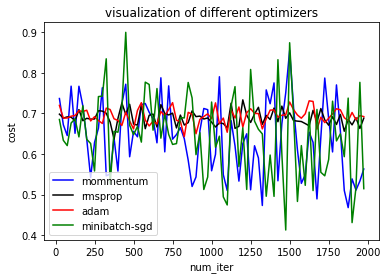

In [8]:
plot_fn(itr,cost_momentum,cost_rms,cost_adam,cost_sgd)